In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
from statistics import mode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest,f_regression
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
sb.set()

d:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
ds = pd.read_csv('bigdatamart_Train.csv')
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### EDA

In [10]:
sales_stats_by_outlet = ds.groupby('Outlet_Identifier').Item_Outlet_Sales.agg(['count',
                                                        'sum','median'])

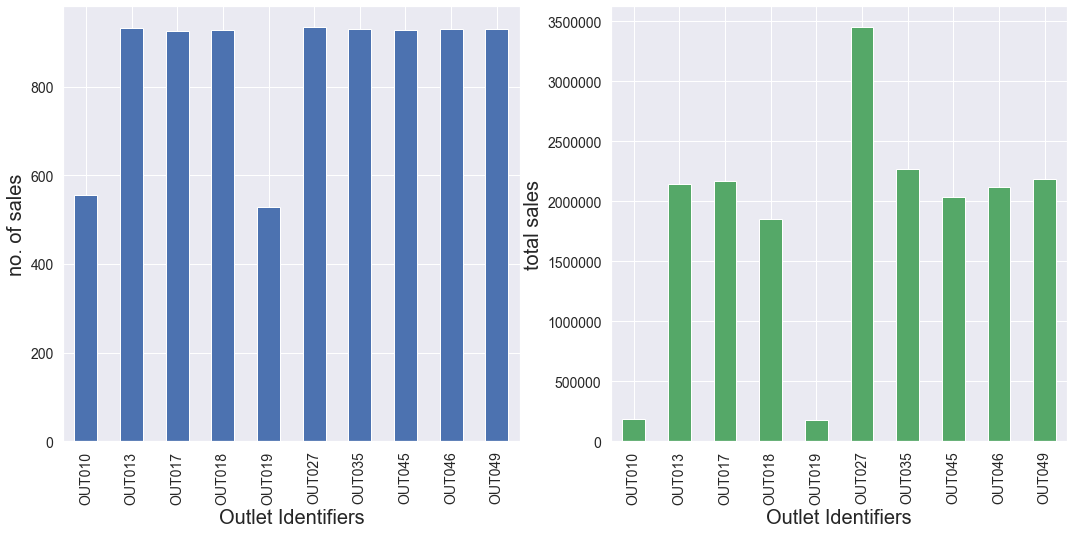

In [11]:
plt.subplot(1,2,1)
sales_stats_by_outlet['count'].plot(kind = 'bar', figsize = (18,8))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('no. of sales', fontsize =  20)
plt.xlabel('Outlet Identifiers', fontsize = 20)

plt.subplot(1,2,2)
sales_stats_by_outlet['sum'].plot(kind = 'bar', figsize = (18,8) , color = 'g')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('total sales', fontsize =  20)
plt.xlabel('Outlet Identifiers', fontsize = 20)

plt.show()

Most of the Outlets have similar sales and total sales, with expection of OUT010, OUT019 and OUT027.
In which  OUT010, OUT019 have low sales and OUT027 have high total sales probably due to higher priced
products availabe there.

In [12]:
sales_stats_by_outlet_type = ds.groupby('Outlet_Type').Item_Outlet_Sales.agg(['count',
                                                        'sum'])

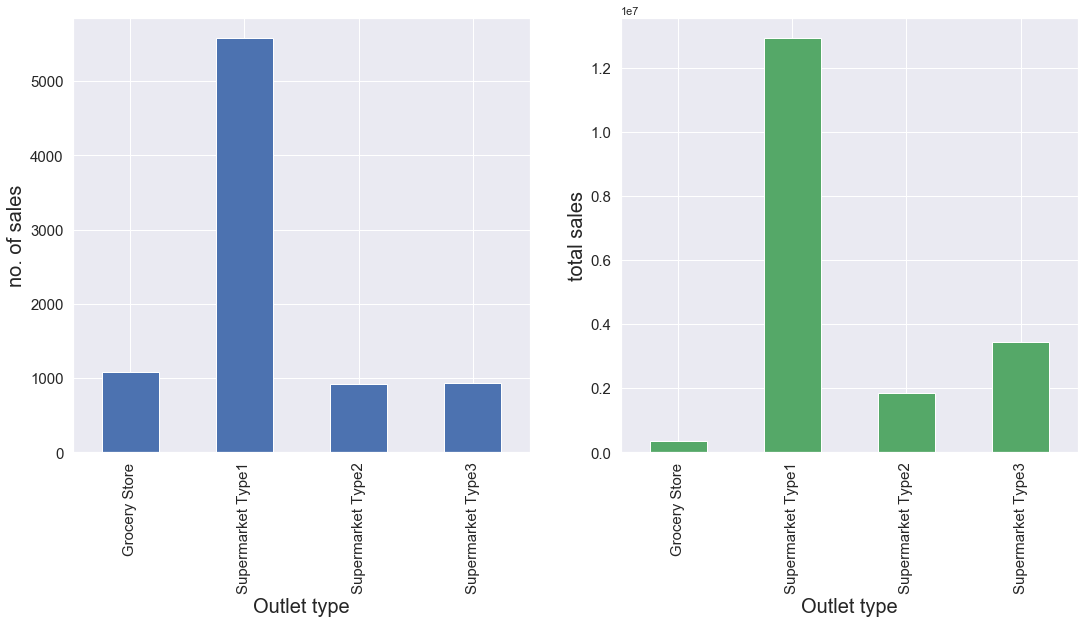

In [13]:
plt.subplot(1,2,1)
sales_stats_by_outlet_type['count'].plot(kind = 'bar', figsize =(18,8))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('no. of sales', fontsize =  20)
plt.xlabel('Outlet type', fontsize = 20)

plt.subplot(1,2,2)
sales_stats_by_outlet_type['sum'].plot(kind = 'bar', figsize = (18,8), color = 'g')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('total sales', fontsize =  20)
plt.xlabel('Outlet type', fontsize = 20)
plt.show()

Supermartket type 1 is highest contributor in sales. Also, it can be inferred that on an average,
grocery store and supermarket type 2 have less expensive products compared other outlet-type.

In [14]:
sales_stats_by_outlet_size = ds.groupby('Outlet_Size').Item_Outlet_Sales.agg(['count',
                                                        'sum'])

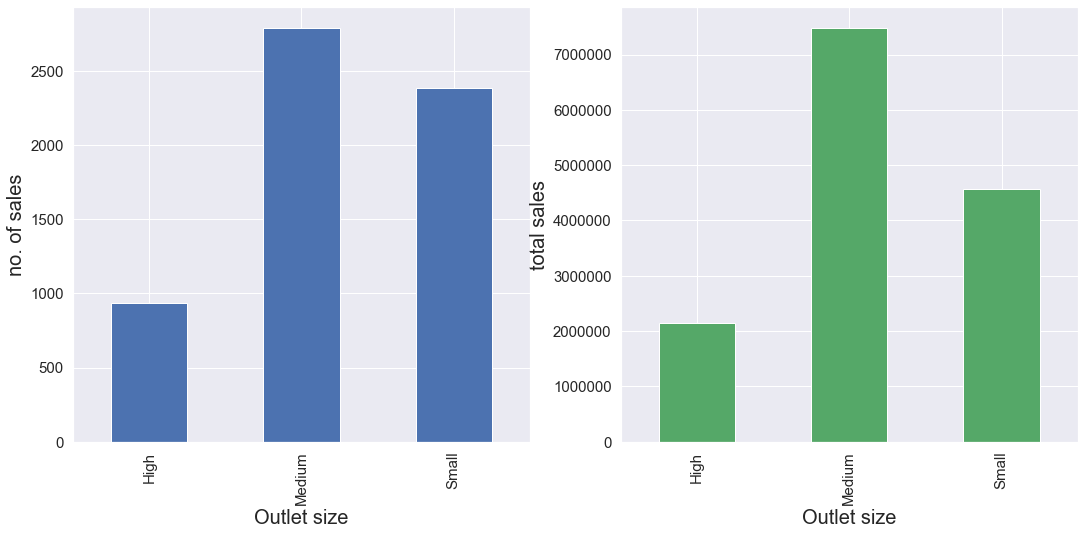

In [15]:
plt.subplot(1,2,1)
sales_stats_by_outlet_size['count'].plot(kind = 'bar', figsize = (18,8))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('no. of sales', fontsize =  20)
plt.xlabel('Outlet size', fontsize = 20)

plt.subplot(1,2,2)
sales_stats_by_outlet_size['sum'].plot(kind = 'bar', figsize = (18,8) , color = 'g')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('total sales', fontsize =  20)
plt.xlabel('Outlet size', fontsize = 20)
plt.show()

It can be observed that mediam sized outlets have higest sales whereas high sized outlets have lowest
sales. So either having high or small size does not help much in sales.

In [16]:
Outlet_Location_Type = ds.groupby('Outlet_Location_Type').Item_Outlet_Sales.agg(['count','sum'])

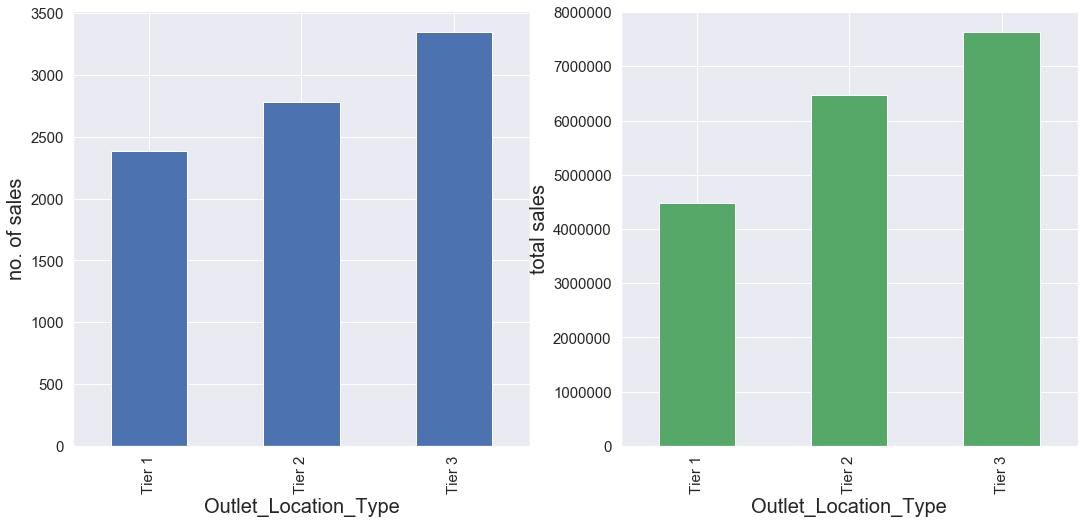

In [17]:
plt.subplot(1,2,1)
Outlet_Location_Type['count'].plot(kind = 'bar', figsize = (18,8))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('no. of sales', fontsize =  20)
plt.xlabel('Outlet_Location_Type', fontsize = 20)

plt.subplot(1,2,2)
Outlet_Location_Type['sum'].plot(kind = 'bar', figsize = (18,8), color = 'g' )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('total sales', fontsize =  20)
plt.xlabel('Outlet_Location_Type', fontsize = 20)
plt.show()

It can be observed that location of outlets plays important role in sales.

In [18]:
sales_by_outlet_establisment = ds.groupby('Outlet_Establishment_Year').Item_Outlet_Sales.agg(['count','sum'])

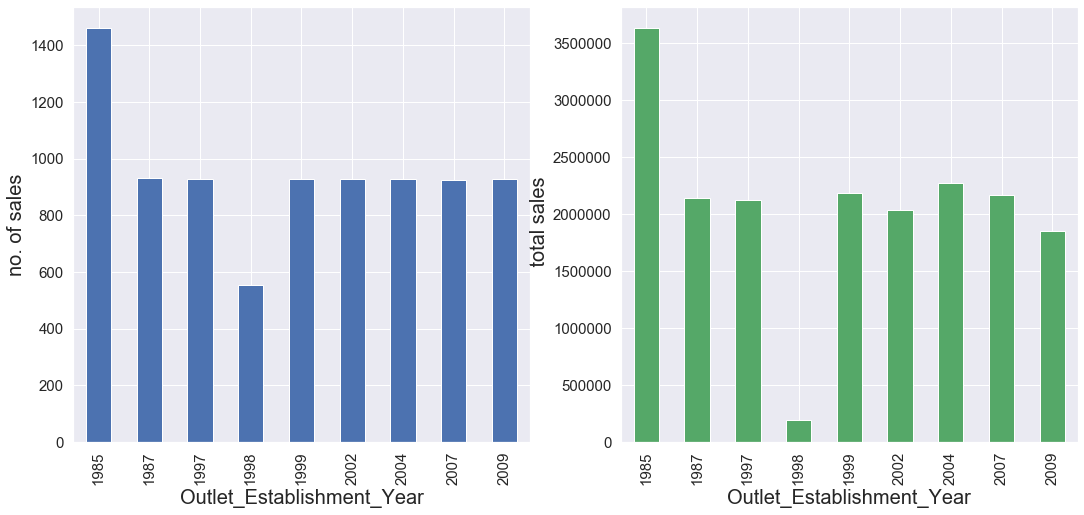

In [19]:
plt.subplot(1,2,1)
sales_by_outlet_establisment['count'].plot(kind = 'bar', figsize = (18,8))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('no. of sales', fontsize =  20)
plt.xlabel('Outlet_Establishment_Year', fontsize = 20)

plt.subplot(1,2,2)
sales_by_outlet_establisment['sum'].plot(kind = 'bar', figsize = (18,8), color = 'g')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel(' total sales', fontsize =  20)
plt.xlabel('Outlet_Establishment_Year', fontsize = 20)
plt.show()

Outlet Eslablised on 1998 and 1985 has the significant effect on no. of sales and total no. of sales, 1985 being the most popular and 1998 the least one.
This could be due to various factors like type of outlet location type, outlet type or may be outlet
size.

In [20]:
ds['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
ds['Item_Fat_Content'].replace('other', 'Low Fat', inplace = True)
ds['Item_Fat_Content'].replace('other', 'Regular', inplace = True)

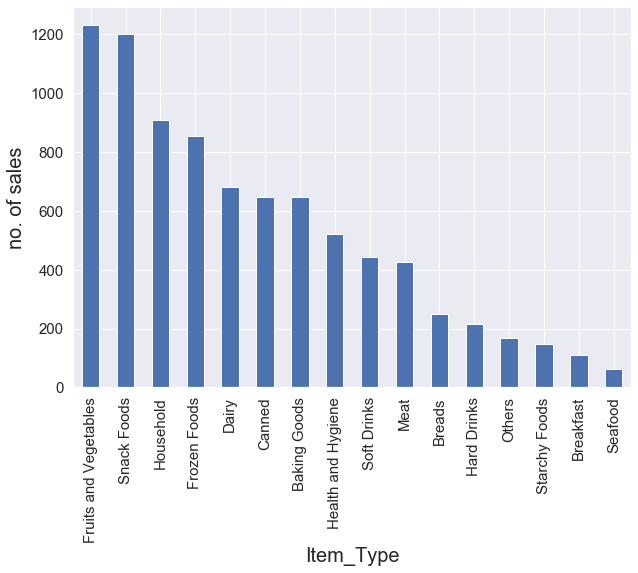

In [21]:
ds['Item_Type'].value_counts().plot(kind = 'bar', figsize = (10,7))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('no. of sales', fontsize =  20)
plt.xlabel('Item_Type', fontsize = 20)
plt.show()

We can see a variations in different item type sold, as it may have possible effect on Item_Outlet_Sales.

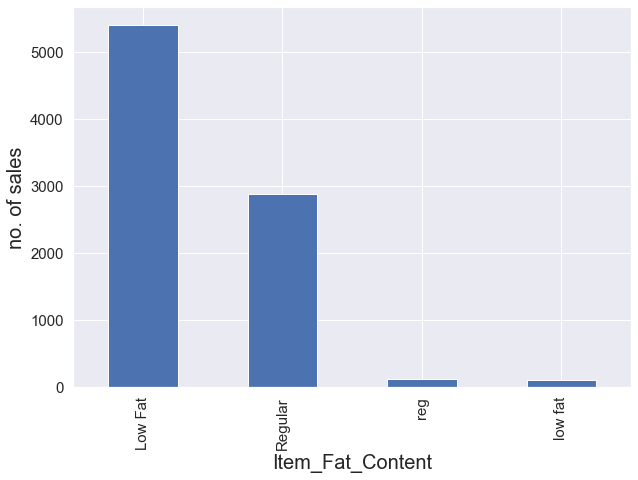

In [22]:
ds['Item_Fat_Content'].value_counts().plot(kind = 'bar', figsize = (10,7))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('no. of sales', fontsize =  20)
plt.xlabel('Item_Fat_Content', fontsize = 20)
plt.show()

Since, and an edible item can have low or regular fat content, so the last two categories must be 
from non-edible group.

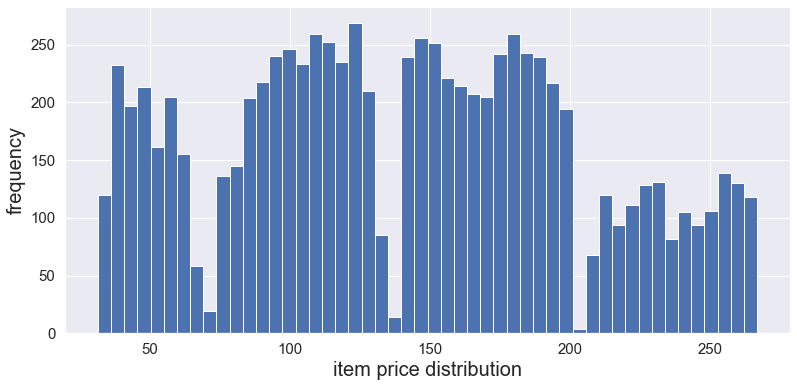

In [23]:
ds.Item_MRP.plot(kind = 'hist', bins = 50, figsize = (13,6))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('frequency', fontsize =  20)
plt.xlabel('item price distribution', fontsize = 20)
plt.show()

Here we see that item price is distributed in a grouped fashion.

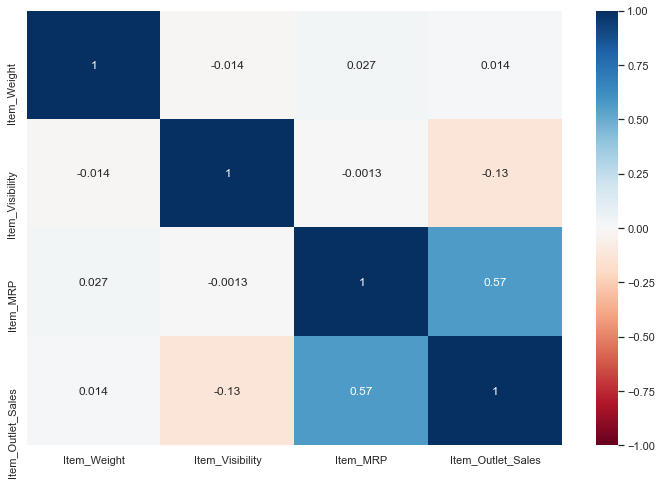

In [24]:
plt.figure(figsize = (12,8))
sb.heatmap(ds[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']].corr(), 
           cmap = 'RdBu', center = 0, vmin = -1, vmax = 1, annot = True)
plt.show()

<Figure size 2520x2160 with 0 Axes>

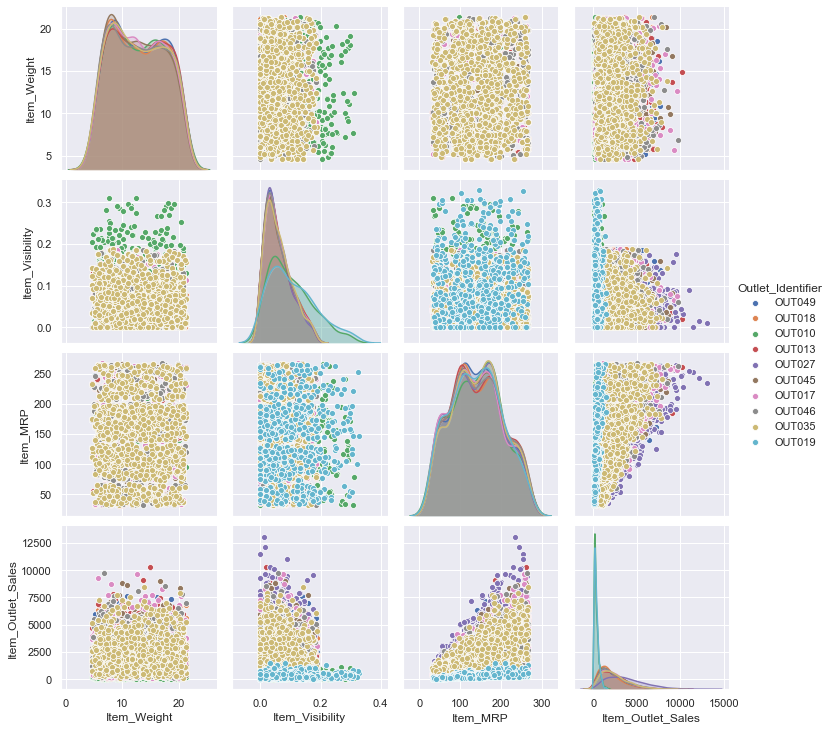

In [25]:
plt.figure(figsize = (35,30))
sb.pairplot(ds[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales','Outlet_Identifier']],
            hue = 'Outlet_Identifier')
plt.show()

In [26]:
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [27]:
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Feature Engineering/Preprocessing of data

In [28]:
ds.Item_Fat_Content.value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
ds.Item_Fat_Content.replace('reg', 'non-edible', inplace = True)
ds.Item_Fat_Content.replace('low fat', 'non-edible', inplace = True)

In [30]:
ds.Item_Fat_Content.value_counts()

Low Fat       5405
Regular       2889
non-edible     229
Name: Item_Fat_Content, dtype: int64

In [31]:
# converting 'Item_Identifier' into its sub categories.
ds['Item_Identifier'] = ds['Item_Identifier'].str[0:2]

In [32]:
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NC,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


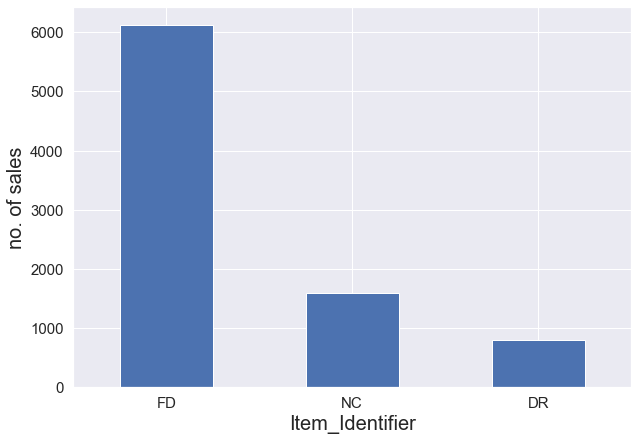

In [33]:
ds['Item_Identifier'].value_counts().plot(kind = 'bar', figsize = (10,7))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('no. of sales', fontsize =  20)
plt.xlabel('Item_Identifier', fontsize = 20)
plt.xticks(rotation = 360)
plt.show()

In [34]:
ds.Item_Fat_Content.value_counts()

Low Fat       5405
Regular       2889
non-edible     229
Name: Item_Fat_Content, dtype: int64

In [35]:
ds.Outlet_Size.mode()

0    Medium
dtype: object

In [36]:
# replacing missing values in outlet size as most frequent variable.
ds['Outlet_Size'].fillna('Medium', inplace = True)

In [37]:
# replacing missing values of 'item weight' and 'outlet size'
ds.groupby('Outlet_Identifier').Item_Weight.agg(['median']).mean()

median    12.61875
dtype: float64

In [38]:
ds['Item_Weight'].fillna(12.61875, inplace = True)

In [39]:
ds.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [40]:
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NC,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [41]:
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NC,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [42]:
x_train, x_test, y_train, y_test = train_test_split(ds.drop(['Item_Outlet_Sales'], 1), 
                                                    ds.Item_Outlet_Sales,
                                                test_size = 0.25, random_state = 42) 

In [43]:
x_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NC,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,FD,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,FD,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,FD,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,FD,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,Medium,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FD,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,OUT010,1998,Medium,Tier 3,Grocery Store
5191,FD,15.600,Low Fat,0.117575,Frozen Foods,75.6670,OUT017,2007,Medium,Tier 2,Supermarket Type1
5390,NC,17.600,Low Fat,0.018944,Health and Hygiene,237.3590,OUT045,2002,Medium,Tier 2,Supermarket Type1
860,FD,20.350,non-edible,0.054363,Snack Foods,117.9466,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [44]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((6392, 11), (2131, 11), (6392,), (2131,))

In [45]:
# target encoding features from target_encoding_list 
target_encoding_list = ['Item_Fat_Content','Item_Identifier','Item_Type','Outlet_Establishment_Year'
                        ,'Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']

encoder = ce.TargetEncoder(cols = target_encoding_list)

x_train[target_encoding_list] = encoder.fit_transform(x_train[target_encoding_list], y_train)
x_test[target_encoding_list] = encoder.transform(x_test[target_encoding_list])

In [46]:
x_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,2174.915980,16.350,2195.897986,0.029565,2284.816759,256.4646,2057.337132,2057.337132,2306.975912,2320.133068,2057.337132
7510,2243.522564,15.250,2253.736366,0.000000,2281.423960,179.7660,2057.337132,2057.337132,2306.975912,2320.133068,2057.337132
5828,2243.522564,12.350,2253.736366,0.158716,2218.408121,157.2946,2381.122405,2381.122405,2306.975912,1906.701727,2338.440148
5327,2243.522564,7.975,2195.897986,0.014628,1985.650998,82.3250,2451.752625,2451.752625,1943.464987,2330.327505,2338.440148
4810,2243.522564,19.350,2195.897986,0.016645,2144.496500,120.9098,2219.079967,2219.079967,2306.975912,2330.327505,2338.440148
...,...,...,...,...,...,...,...,...,...,...,...
5734,2243.522564,9.395,2253.736366,0.286345,2326.463222,139.1838,352.970260,352.970260,2306.975912,2320.133068,347.852585
5191,2243.522564,15.600,2195.897986,0.117575,2144.496500,75.6670,2318.395725,2318.395725,2306.975912,2330.327505,2338.440148
5390,2174.915980,17.600,2195.897986,0.018944,2053.122338,237.3590,2219.079967,2219.079967,2306.975912,2330.327505,2338.440148
860,2243.522564,20.350,1988.683023,0.054363,2281.423960,117.9466,2318.395725,2318.395725,2306.975912,2330.327505,2338.440148


In [47]:
x_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7503,2243.522564,14.30000,2195.897986,0.026300,2144.496500,79.4302,2350.452771,2350.452771,2350.452771,2320.133068,2338.440148
2957,2174.915980,7.93000,2195.897986,0.071136,2053.122338,42.7086,2309.598889,2309.598889,1943.464987,1906.701727,2338.440148
7031,2243.522564,14.50000,2253.736366,0.041313,2264.662640,42.0454,2381.122405,2381.122405,2306.975912,1906.701727,2338.440148
1084,2024.006349,12.61875,2253.736366,0.044767,2028.248063,173.7054,3676.275018,2519.781748,2306.975912,2320.133068,3676.275018
856,2243.522564,10.19500,2253.736366,0.012456,2218.408121,197.5110,2451.752625,2451.752625,1943.464987,2330.327505,2338.440148
...,...,...,...,...,...,...,...,...,...,...,...
4753,2243.522564,17.60000,2195.897986,0.007994,2225.161381,171.6422,2350.452771,2350.452771,2350.452771,2320.133068,2338.440148
4836,2243.522564,10.19500,2195.897986,0.000000,2144.496500,143.1154,2318.395725,2318.395725,2306.975912,2330.327505,2338.440148
8064,2243.522564,8.10000,2195.897986,0.128296,2326.463222,210.4902,2219.079967,2219.079967,2306.975912,2330.327505,2338.440148
4418,2174.915980,6.59000,2195.897986,0.026226,2284.816759,119.0098,2381.122405,2381.122405,2306.975912,1906.701727,2338.440148


In [48]:
# MinMax-Scaling features form scaling_list.
scaling_list = ['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility',
                'Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size',
                'Outlet_Location_Type','Outlet_Type','Outlet_Identifier']

train_test = [x_train, x_test]

for dataset in train_test:
    
    for features in scaling_list:
        dataset[features] = MinMaxScaler().fit_transform(dataset[features].values.reshape(-1,1))

In [49]:
x_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,0.687465,0.702292,0.781786,0.090031,0.608873,0.955756,0.514409,0.786578,0.893174,0.975935,0.513602
7510,1.000000,0.636797,1.000000,0.000000,0.602652,0.630208,0.514409,0.786578,0.893174,0.975935,0.513602
5828,1.000000,0.464126,1.000000,0.483313,0.487107,0.534828,0.611526,0.936008,0.893174,0.000000,0.598057
5327,1.000000,0.203632,0.781786,0.044546,0.060326,0.216619,0.632712,0.968604,0.000000,1.000000,0.598057
4810,1.000000,0.880917,0.781786,0.050687,0.351583,0.380392,0.562923,0.861224,0.893174,1.000000,0.598057
...,...,...,...,...,...,...,...,...,...,...,...
5734,1.000000,0.288181,1.000000,0.871963,0.685235,0.457956,0.003194,0.000000,0.893174,0.975935,0.000000
5191,1.000000,0.657636,0.781786,0.358032,0.351583,0.188359,0.592712,0.907059,0.893174,1.000000,0.598057
5390,0.687465,0.776719,0.781786,0.057686,0.184041,0.874662,0.562923,0.861224,0.893174,1.000000,0.598057
860,1.000000,0.940458,0.000000,0.165543,0.602652,0.367815,0.592712,0.907059,0.893174,1.000000,0.598057


In [50]:
x_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,0.687465,0.702292,0.781786,0.090031,0.608873,0.955756,0.514409,0.786578,0.893174,0.975935,0.513602
7510,1.000000,0.636797,1.000000,0.000000,0.602652,0.630208,0.514409,0.786578,0.893174,0.975935,0.513602
5828,1.000000,0.464126,1.000000,0.483313,0.487107,0.534828,0.611526,0.936008,0.893174,0.000000,0.598057
5327,1.000000,0.203632,0.781786,0.044546,0.060326,0.216619,0.632712,0.968604,0.000000,1.000000,0.598057
4810,1.000000,0.880917,0.781786,0.050687,0.351583,0.380392,0.562923,0.861224,0.893174,1.000000,0.598057
...,...,...,...,...,...,...,...,...,...,...,...
5734,1.000000,0.288181,1.000000,0.871963,0.685235,0.457956,0.003194,0.000000,0.893174,0.975935,0.000000
5191,1.000000,0.657636,0.781786,0.358032,0.351583,0.188359,0.592712,0.907059,0.893174,1.000000,0.598057
5390,0.687465,0.776719,0.781786,0.057686,0.184041,0.874662,0.562923,0.861224,0.893174,1.000000,0.598057
860,1.000000,0.940458,0.000000,0.165543,0.602652,0.367815,0.592712,0.907059,0.893174,1.000000,0.598057


In [51]:
k = KFold(n_splits = 10, shuffle = True, random_state = 42)

#### Base Model Evaluation

model: RandomForestRegressor()
CV score:0.5611271162011955
score_std: 0.017023457237323902
----------
model: LinearRegression(normalize=True)
CV score:0.5589227813238364
score_std: 0.015480233583402862
----------
model: SVR()
CV score:0.06953657437712753
score_std: 0.01509735535364729
----------
model: AdaBoostRegressor()
CV score:0.47418201219443123
score_std: 0.041821336542416376
----------
model: GradientBoostingRegressor()
CV score:0.5986727921374955
score_std: 0.013876067253204777
----------
model: KNeighborsRegressor()
CV score:0.5170113817370153
score_std: 0.023636580217760012
----------
model: XGBRegressor(silent=True)
CV score:0.5993878727730843
score_std: 0.013583108002225614
----------
model: Lasso(normalize=True)
CV score:0.55568378125676
score_std: 0.015270279150616529
----------
model: Ridge(normalize=True)
CV score:0.4556920934125716
score_std: 0.01684467597046989
----------
model: ElasticNet()
CV score:0.17305237174215793
score_std: 0.008574958806643898
----------


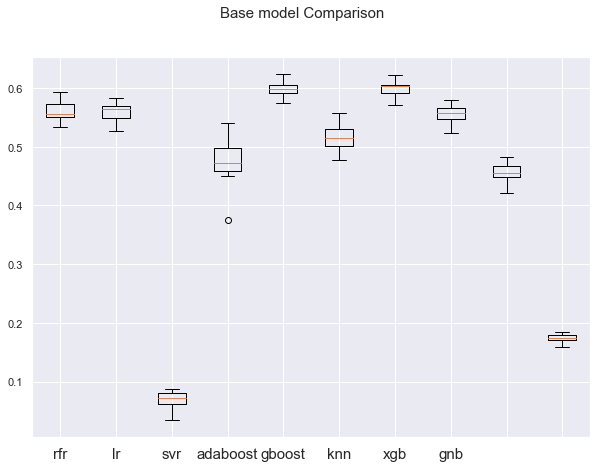

In [52]:
rfr = RandomForestRegressor()
svr = SVR()
lr = LinearRegression(normalize = True)
adaboost =  AdaBoostRegressor()
gboost = GradientBoostingRegressor()
knn = KNeighborsRegressor()
xgb = xgboost.XGBRegressor(silent = True)
lss = Lasso(normalize = True)
rdr = Ridge(normalize = True)
elnr = ElasticNet()

models = [rfr, lr, svr, adaboost, gboost, knn, xgb, lss, rdr, elnr]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = k, scoring = 'r2', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfr', 'lr','svr', 'adaboost', 'gboost', 'knn', 'xgb', 'gnb'],
                  fontsize = 15)
fig.set_size_inches(10,7)
plt.show() 

Here we see that xgb and gboost model performed best with small spread and highest mean and median, so we shall tune these models.

In [53]:
param_gboost =  dict(
    learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
    n_estimators = [100, 150, 200],
    min_samples_split = [1,2,3])
  
param_xgb = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ],
     alpha = [0.1,0.5,0.75,1,2])
     

#### Hyper-parameter tuning

In [54]:
model_param_list = [(gboost,param_gboost), (xgb,param_xgb)]

In [55]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    r_rearch = RandomizedSearchCV(model, param, cv = 5, n_jobs = -1, scoring = 'r2',
                                  random_state = 42)
    r_rearch.fit(x_train, y_train.values.ravel())
    best_cvscore = r_rearch.best_score_
    best_param = r_rearch.best_params_
    best_estimator = r_rearch.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
    
print('best_estimators:',best_estimator_list)

model: GradientBoostingRegressor()
best_cvscore: 0.5978538756467368
best_param: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.1}


model: XGBRegressor(silent=True)
best_cvscore: 0.594933151398496
best_param: {'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.7, 'alpha': 0.75}


best_estimators: [GradientBoostingRegressor(), XGBRegressor(alpha=0.75, colsample_bytree=0.7, gamma=0.4, min_child_weight=7,
             silent=True)]
Wall time: 30.8 s


#### Testing

In [56]:
# testing for train data
for model in best_estimator_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    score = r2_score(y_train, y_pred)
    print('model',model)
    print('accuracy %:',  round(score*100,3))
    print('root_mean_squared_error:',mean_squared_error(y_train, y_pred, squared = False))
    print('\n')


model GradientBoostingRegressor()
accuracy %: 64.041
root_mean_squared_error: 1031.6031683181432


model XGBRegressor(alpha=0.75, colsample_bytree=0.7, gamma=0.4, min_child_weight=7,
             silent=True)
accuracy %: 63.055
root_mean_squared_error: 1045.6423558202505




In [57]:
# testing for test data
for model in best_estimator_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    print('model',model)
    print('accuracy %:', round(score*100,3))
    print('root_mean_squared_error:',mean_squared_error(y_test, y_pred, squared = False))
    print('\n')


model GradientBoostingRegressor()
accuracy %: 59.349
root_mean_squared_error: 1059.0382323712527


model XGBRegressor(alpha=0.75, colsample_bytree=0.7, gamma=0.4, min_child_weight=7,
             silent=True)
accuracy %: 60.191
root_mean_squared_error: 1048.003011507531




Here, we can choose our XGboost model as it performed bit better then Gradiantboost model and genelarized
better on unseen/test data. However, there is more room for improvement, perhaps by doing more feature
engineering and adding more features after finding if the model is biased.